## Assignment on Preprocessing 

### Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Load the dataset into python environment

In [2]:
data0 = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\titanic_dataset.csv')  
data0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Make ‘PassengerId’ as the index column

In [3]:
data1 = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\titanic_dataset.csv', index_col='PassengerId')
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the basic details of the dataset

In [4]:
# Check the dimensions (number of rows and columns) of the dataset:

data1.shape

(891, 11)

In [5]:
# Get a summary of the dataset's columns, data types, and non-null values:

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# Compute descriptive statistics of the dataset:

data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for count of null values in each column:

data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

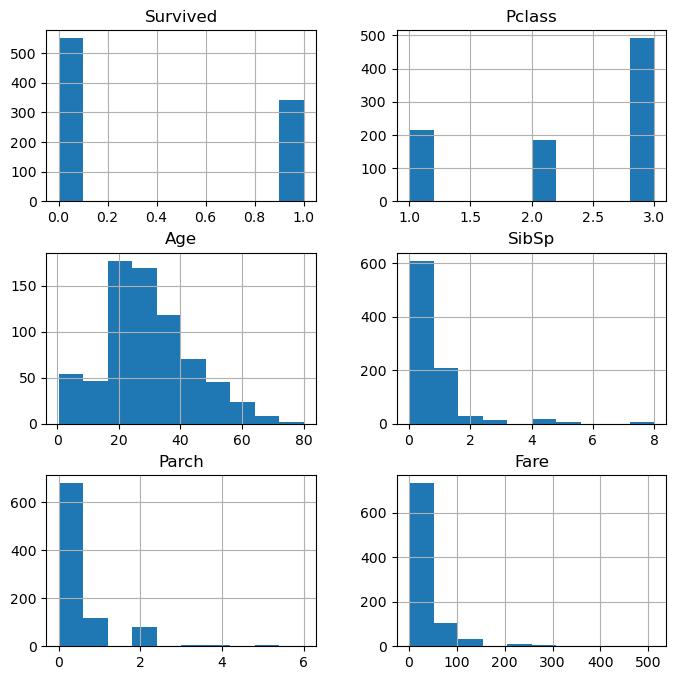

In [8]:
# Plot frequency graphs for columns with data types 'float' and 'int' in the dataset:

freqgraph = data1.select_dtypes(include=['float', 'int'])
freqgraph.hist(figsize=(8, 8))
plt.show()

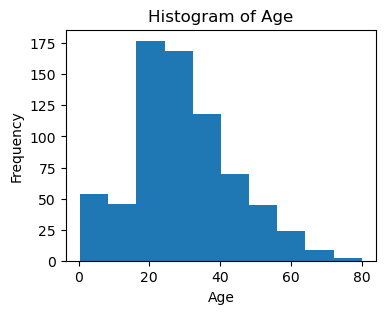

In [9]:
# Create frequency histogram for the "Age" column to analyze whether the data is normally distributed or skewed:
# Histogram provide a visual representation of the distribution of values in the data:

plt.figure(figsize=(4,3))
plt.hist(data1['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

### Fill in all the Missing Values present in all the columns in the dataset

In [10]:
# Filling the missing values in the "Age" column of the dataset with the median value of the column:

data1['Age']=data1['Age'].fillna(data1['Age'].median())

In [11]:
# Filling the missing values in categorical data columns('Cabin' & 'Embarked')with the mode value of each respective column:

for col in ['Cabin', 'Embarked']:
    data1[col] = data1[col].fillna(data1[col].mode()[0])

In [12]:
# Again check for count of null values in each column after filling the missing values:

data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Check and Handle Outliers in at least 3 columns in the dataset

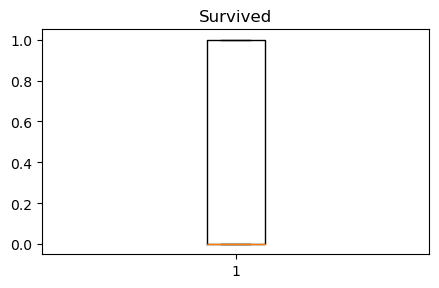

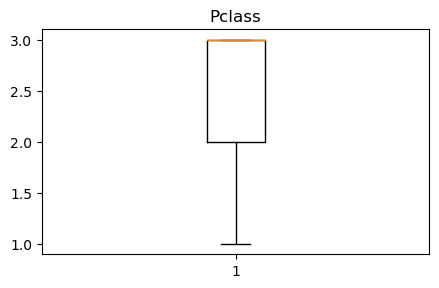

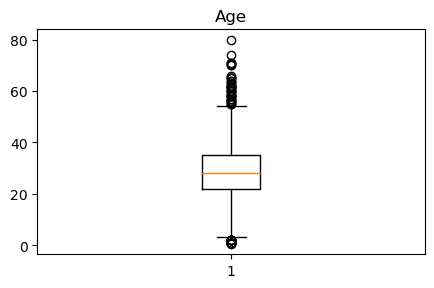

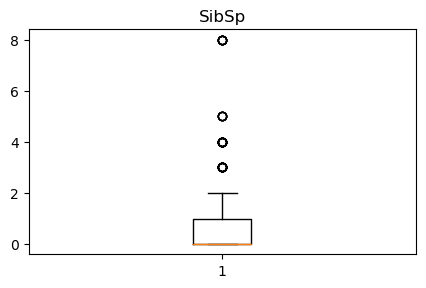

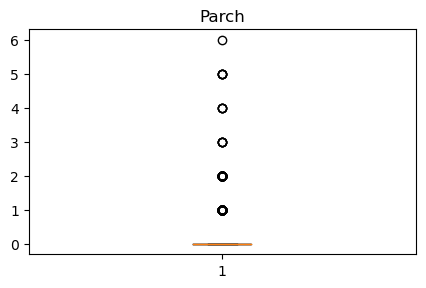

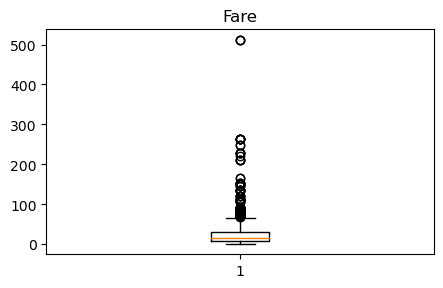

In [13]:
# Create box plots for the numerical columns:

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for i in num_cols:
    plt.figure(figsize=(5,2.92))
    plt.boxplot(data1[i])
    plt.title(i)

In [14]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [15]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Age' column :

Q1 = np.percentile(data1['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data1['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data1['Age'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 22.0
Q2 = 28.0
Q3 = 35.0


In [16]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 13.0


In [17]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  54.5
low_lim =  2.5


In [18]:
# Handling Outliers

# Flooring And Capping operation is the quantile-based technique involves:
# Flooring (setting a minimum value) for lower values based on a specific percentile (25th percentile),
# Capping (setting a maximum value) for higher values based on another specific percentile (75th percentile).
# The lower values below the 25th percentile are replaced with the value of the 25th percentile (flooring),
# Similarly, the higher values above the 75th percentile are replaced with the value of the 75th percentile (capping).

In [19]:
# Handle the outliers in the 'Age' column of the dataset:

data1['Age'] = np.where(data1['Age'] > up_lim, up_lim, np.where(data1['Age'] < low_lim, low_lim, data1['Age']))

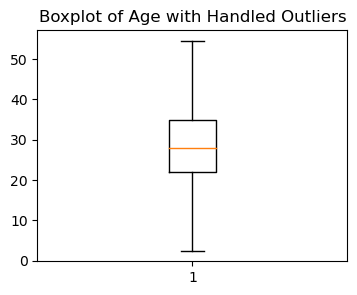

In [20]:
plt.figure(figsize=(4, 3))
plt.boxplot(data1['Age'])
plt.title('Boxplot of Age with Handled Outliers')
plt.show()

In [21]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'SibSp' column :

Q1 = np.percentile(data1['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data1['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data1['SibSp'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 0.0
Q3 = 1.0


In [22]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 1.0


In [23]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  2.5
low_lim =  -1.5


In [24]:
# Handle the outliers in the 'SibSp' column of the dataset:

data1['SibSp'] = np.where(data1['SibSp'] > up_lim, up_lim, np.where(data1['SibSp'] < low_lim, low_lim, data1['SibSp']))

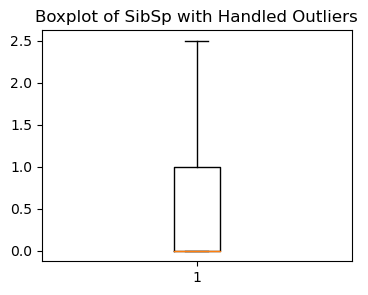

In [25]:
plt.figure(figsize=(4, 3))
plt.boxplot(data1['SibSp'])
plt.title('Boxplot of SibSp with Handled Outliers')
plt.show()

In [26]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Fare' column :

Q1 = np.percentile(data1['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data1['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data1['Fare'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 7.9104
Q2 = 14.4542
Q3 = 31.0


In [27]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 23.0896


In [28]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  65.6344
low_lim =  -26.724


In [29]:
# Handle the outliers in the 'Fare' column of the dataset:

data1['Fare'] = np.where(data1['Fare'] > up_lim, up_lim, np.where(data1['Fare'] < low_lim, low_lim, data1['Fare']))

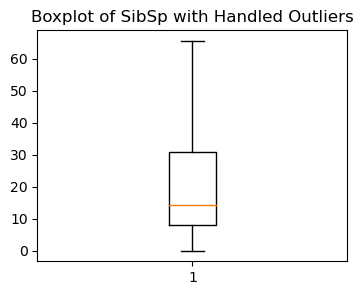

In [30]:
plt.figure(figsize=(4, 3))
plt.boxplot(data1['Fare'])
plt.title('Boxplot of SibSp with Handled Outliers')
plt.show()

### Do Min Max Scaling on the Feature set (take ‘Survived’ as Target)

In [31]:
# Import the MinMaxScaler from the sklearn.preprocessing:
from sklearn.preprocessing import MinMaxScaler

# Separate the Feature set (X) and Target variable (y):
X = data1.drop('Survived', axis=1)
y = data1['Survived']

# Drop categorical columns before performing scaling on numerical features:
X1 = X.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis = 1)

# Display the first few rows of remaining numerical columns:
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0,7.2500
2,1,38.0,1.0,0,65.6344
3,3,26.0,0.0,0,7.9250
4,1,35.0,1.0,0,53.1000
5,3,35.0,0.0,0,8.0500


In [32]:
# Initialize the MinMaxScaler:
min_max = MinMaxScaler()

# Fit and transform the feature set:
X_scaled = min_max.fit_transform(X1)

# Print the scaled feature set:
print('X_scaled:\n', X_scaled)

# when you perform Min-Max scaling using MinMaxScaler on your feature set X;
# the resulting transformed data will be a NumPy array:
print('Type(X_scaled):\n',type(X_scaled))

X_scaled:
 [[1.         0.375      0.4        0.         0.11046037]
 [0.         0.68269231 0.4        0.         1.        ]
 [1.         0.45192308 0.         0.         0.12074461]
 ...
 [1.         0.49038462 0.4        0.33333333 0.35728216]
 [0.         0.45192308 0.         0.         0.45707739]
 [1.         0.56730769 0.         0.         0.11807832]]
Type(X_scaled):
 <class 'numpy.ndarray'>


In [33]:
# Transform a NumPy array into a DataFrame:
X_scaled = pd.DataFrame(X_scaled,columns = ['Pclass','Age','SibSp','Parch','Fare'])

# Generate descriptive statistics for the DataFrame:
X_scaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375
std,0.418036,0.232155,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000
